In [4]:
! pip install opencv-python

In [142]:
import pandas as pd
import cv2
import numpy as np
from numpy import asarray
from matplotlib import image
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
import tensorflow as tf
from skimage.filters import median
from skimage.morphology import disk
import PIL
import scipy 
from scipy import signal, ndimage

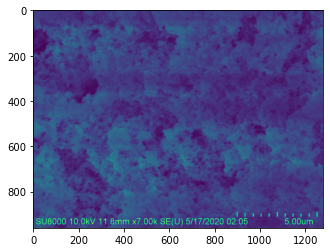

In [120]:
img = plt.imread('./498.tif')
plt.imshow(img)

In [121]:
# Convert the image to grayscale
#gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gr = img
    # Make a copy of the grayscale image
bg = gr.copy()

    # Apply morphological transformations
for i in range(5):
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                            (2 * i + 1, 2 * i + 1))
    bg = cv2.morphologyEx(bg, cv2.MORPH_CLOSE, kernel2)
    bg = cv2.morphologyEx(bg, cv2.MORPH_OPEN, kernel2)

    # Subtract the grayscale image from its processed copy
dif = cv2.subtract(bg, gr)

    # Apply thresholding
bw = cv2.threshold(dif, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
dark = cv2.threshold(bg, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Extract pixels in the dark region
darkpix = gr[np.where(dark > 0)]

    # Threshold the dark region to get the darker pixels inside it
darkpix = cv2.threshold(darkpix, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Paste the extracted darker pixels in the watermark region
bw[np.where(dark > 0)] = darkpix.T
cv2.imwrite('final.jpg', bw)


#back_rm('watermark.jpg')

True

In [122]:
img2 = cv2.imread('./498.tif')

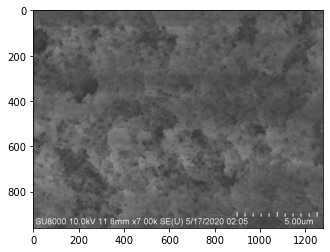

In [123]:
plt.imshow(img2)

In [124]:
img2.shape

(960, 1280, 3)

In [125]:
mask = np.zeros((img2.shape[0], img2.shape[1], img2.shape[2]))

In [126]:
mask

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [264]:
#Use PIL Pillow to load the image
import PIL

In [284]:
image = PIL.Image.open('./498.tif')

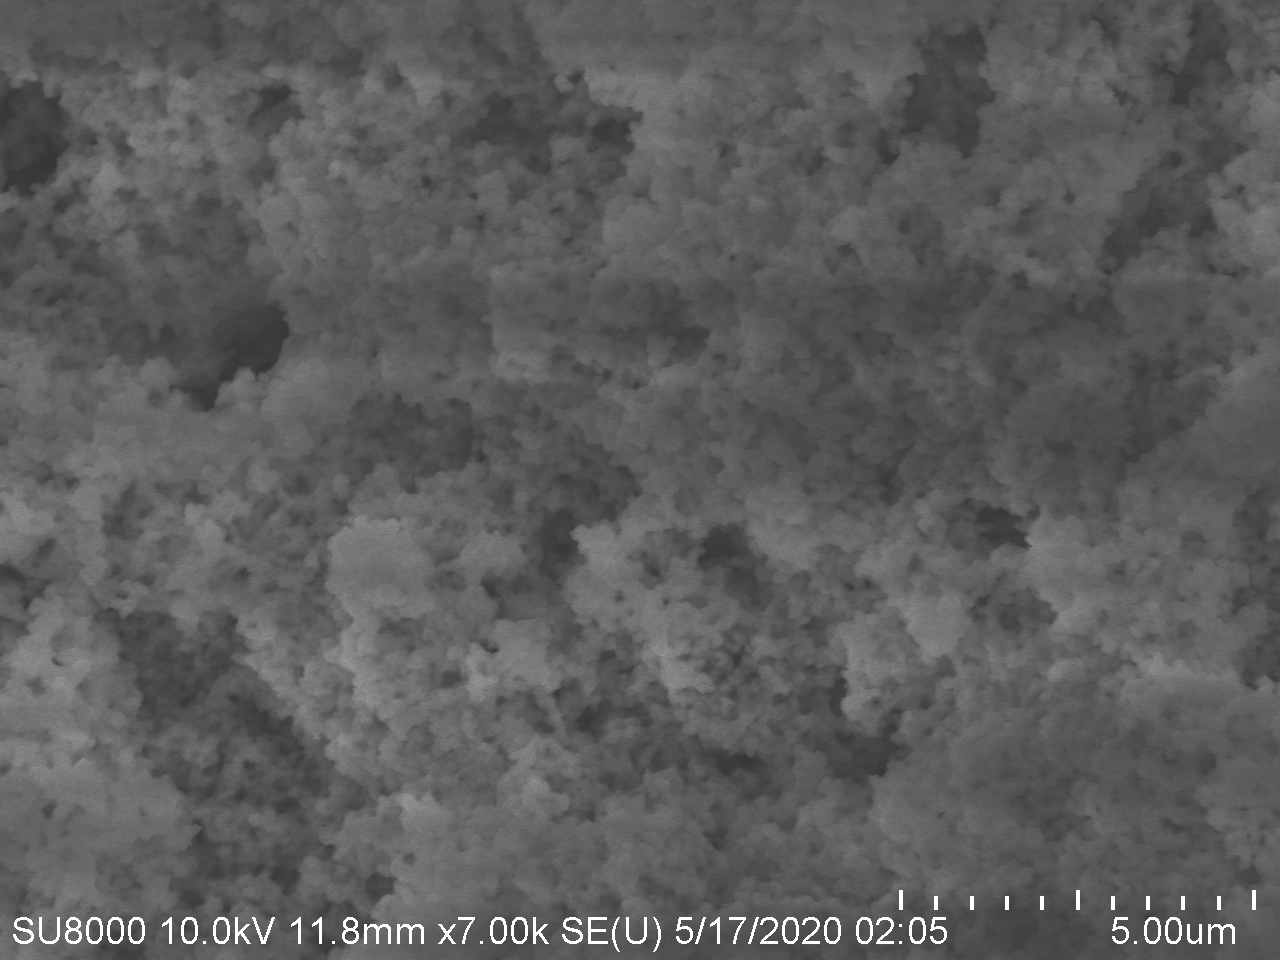

In [285]:
image

In [286]:
#Check the image type loaded from Pillow
print('format', image.format)
print('size', image.size)
print('image mode', image.mode)

format TIFF
size (1280, 960)
image mode L


In [304]:
#use numpy to convert into nparray
image_nparray = asarray(image)

In [305]:
image_nparray

array([[ 90,  90,  92, ...,  82,  85,  83],
       [ 89,  90,  92, ...,  80,  83,  85],
       [ 89,  90,  92, ...,  82,  84,  84],
       ...,
       [113, 111, 114, ...,  85,  85,  86],
       [106, 111, 114, ...,  82,  83,  85],
       [103, 109, 113, ...,  86,  84,  84]], dtype=uint8)

In [306]:
array_copy = image_nparray.copy()

In [307]:
df_copy = pd.DataFrame(array_copy)

In [308]:
df = pd.DataFrame(image_nparray)

In [309]:
df.shape

(960, 1280)

In [310]:
start_point = [350, 0]
end_point = [280, 1280]

start_point1 = [400, 400]
end_point1 = [500, 1280]

#squared_loc = [end_point[0]:start_point[0], start_point[1]:end_point[1]]

In [311]:
df_copy.loc[end_point[0]:start_point[0], start_point[1]:end_point[1]] = df.loc[end_point[0]:start_point[0], start_point[1]:end_point[1]].add(5)
df_copy.loc[end_point1[0]:start_point1[0], start_point1[1]:end_point1[1]] = df.loc[end_point1[0]:start_point1[0], start_point1[1]:end_point1[1]].add(5)

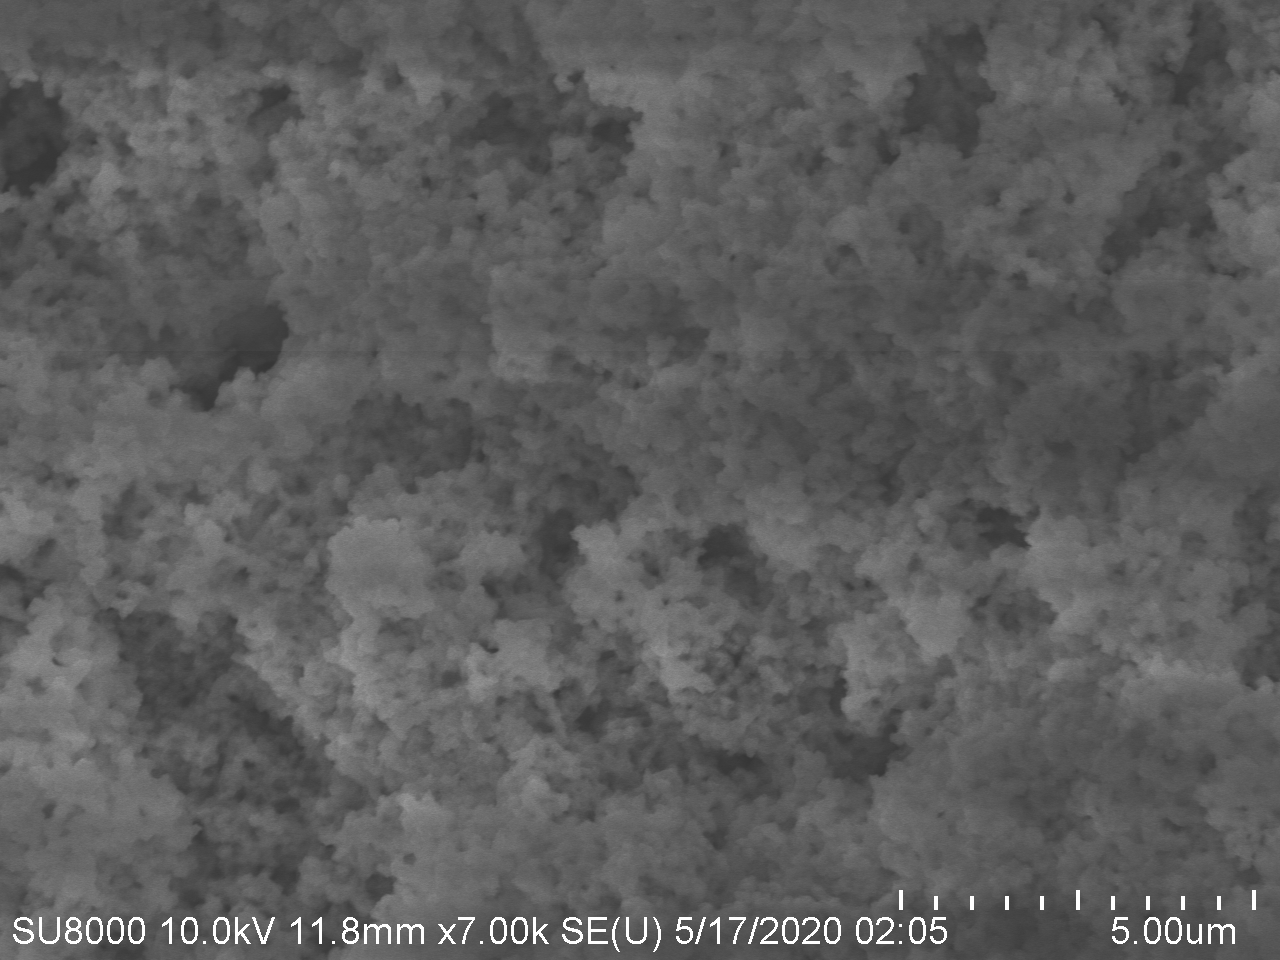

In [312]:
PIL.Image.fromarray(df_copy.values)

In [313]:
applied_filter_range = 3

In [314]:
preapplied_filter_start = df_copy.loc[start_point[0]+2:start_point[0]-2, start_point[1]:end_point[1]]
preapplied_filter_end = df_copy.loc[end_point[0]+2:end_point[0]-2, start_point[1]:end_point[1]]

In [315]:
postapplied_filter_start = scipy.ndimage.median_filter(preapplied_filter_start, size = 3)
postapplied_filter_end = scipy.ndimage.median_filter(preapplied_filter_start, size = 3)

In [316]:
#fix back to the dataset

In [317]:
df_copy.loc[start_point[0]+3:start_point[0]-3, start_point[1]:end_point[1]] = postapplied_filter_start 
df_copy.loc[end_point[0]+3:end_point[0]-3, start_point[1]:end_point[1]] = postapplied_filter_end

In [318]:
df_copy

0     1     2     3     4     5     6     7     8     9     ...  1270  \
0      90    90    92    91    91    92    90    92    91    93  ...    79   
1      89    90    92    91    92    93    90    89    89    90  ...    81   
2      89    90    92    93    90    90    90    88    89    90  ...    81   
3      88    88    86    87    87    87    88    87    88    89  ...    81   
4      92    92    91    88    88    88    89    88    89    87  ...    85   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
955   107   107   105   109   111   108   107   106   108   110  ...    85   
956   108   110   109   109   109   109   106   104   105   103  ...    82   
957   113   111   114   113   112   111   111   111   107   106  ...    84   
958   106   111   114   114   112   108   109   109   109   109  ...    82   
959   103   109   113   113   112   110   109   112   111   110  ...    85   

     1271  1272  1273  1274  1275  1276  1277  1278  1279  
0      78    78    79    80    80    79    82    85    83  
1      81    81    79    80    81    80    80    83    85  
2      80    79    79    78    81    81    82    84    84  
3      81    79    79    79    81    82    80    82    83  
4      86    81    80    81    85    84    85    86    84  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
955    84    84    84    85    85    85    87    86    84  
956    84    85    84    84    84    84    84    84    85  
957    84    84    86    85    86    85    85    85    86  
958    83    84    86    83    83    84    82    83    85  
959    87    88    87    88    89    87    86    84    84  

[960 rows x 1280 columns]

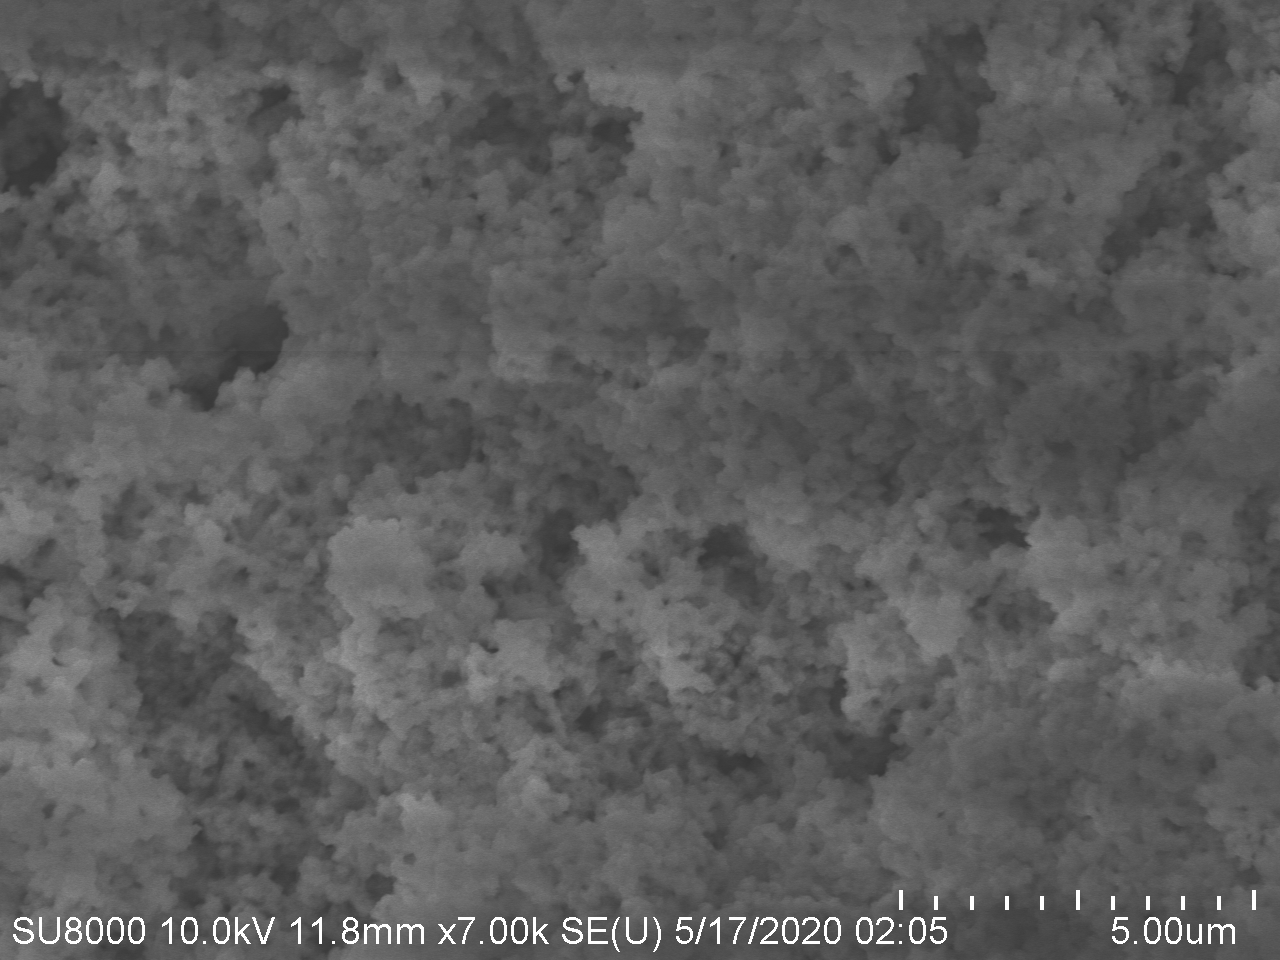

In [319]:
PIL.Image.fromarray(df_copy.values)

In [135]:
array_edited = PIL.Image.fromarray(df.values)

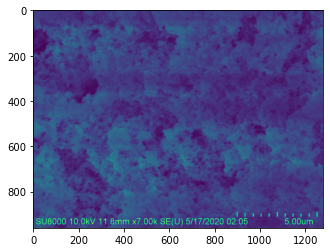

In [131]:
plt.imshow(array_edited)

In [145]:
df_1 = df.iloc[300:315, 0:1280]+4

In [146]:
df_1

0     1     2     3     4     5     6     7     8     9     ...  1270  \
300    89    88    91    92    92    92    92    92    92    92  ...    91   
301    88    91    90    91    93    93    93    93    91    93  ...    91   
302    91    92    93    96    96    94    95    94    94    95  ...    95   
303    89    89    91    91    93    93    94    92    95    92  ...    93   
304    86    87    90    93    95    92    93    96    95    94  ...    92   
305    87    90    91    92    93    94    92    92    94    95  ...    93   
306    85    86    90    90    89    90    93    93    93    93  ...    91   
307    87    87    86    87    87    88    91    92    96    96  ...    93   
308    85    82    82    84    85    87    88    90    95    93  ...    92   
309    84    84    84    82    83    84    84    87    91    92  ...    92   
310    82    83    82    83    81    85    85    88    89    89  ...    89   
311    88    87    87    86    85    86    85    84    87    90  ...    90   
312    89    87    85    83    83    85    85    86    87    88  ...    93   
313    92    91    89    86    85    86    86    85    86    83  ...    97   
314    90    88    87    86    86    88    85    87    85    84  ...    96   

     1271  1272  1273  1274  1275  1276  1277  1278  1279  
300    92    92    93    92    92    95    95    96    98  
301    92    95    91    91    92    93    95    97    95  
302    95    92    91    93    93    94    94    94    95  
303    91    90    91    92    93    96    97    99    99  
304    92    92    91    91    93    93    96    99    98  
305    91    91    91    89    90    91    91    95    97  
306    92    93    92    95    96    94    93    92    92  
307    89    91    94    94    96    96    97    99    96  
308    92    92    93    94    96    93    93    94    97  
309    91    91    94    95    96    98    98    97    95  
310    90    91    91    91    98    98    98    99    95  
311    91    91    91    92    94    97    97    95    96  
312    95    95    94    95    96    96    94    93    96  
313    96    95    97    95    95   100   100    99    95  
314    96    97    95    95    94    95    95    96    96  

[15 rows x 1280 columns]

In [148]:
df_1.values

array([[ 89,  88,  91, ...,  95,  96,  98],
       [ 88,  91,  90, ...,  95,  97,  95],
       [ 91,  92,  93, ...,  94,  94,  95],
       ...,
       [ 89,  87,  85, ...,  94,  93,  96],
       [ 92,  91,  89, ..., 100,  99,  95],
       [ 90,  88,  87, ...,  95,  96,  96]], dtype=uint8)

In [74]:
#use matplotlib import image
#load the image as pixel array!!!
image1 = image.imread('./TEM/SC/498.tif')

In [73]:
print('image dtype:', image1.dtype)
print('image shape:', image1.shape)

image dtype: uint8
image shape: (960, 1280)


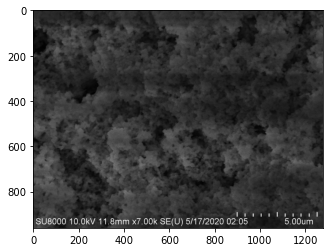

In [76]:
plt.imshow(image1)

In [94]:
image1.shape

(960, 1280)

In [122]:
image2 = cv2.imread('./TEM/SC/498.tif', 0)
start_point = (0, 300)
end_point = (1280, 315)
color = (0,0,0)
thickness = -1
image3 = cv2.rectangle(image2, start_point, end_point, color, thickness)
cv2.imshow('repair_image', image3)

In [123]:
image3

array([[ 90,  90,  92, ...,  82,  85,  83],
       [ 89,  90,  92, ...,  80,  83,  85],
       [ 89,  90,  92, ...,  82,  84,  84],
       ...,
       [113, 111, 114, ...,  85,  85,  86],
       [106, 111, 114, ...,  82,  83,  85],
       [103, 109, 113, ...,  86,  84,  84]], dtype=uint8)

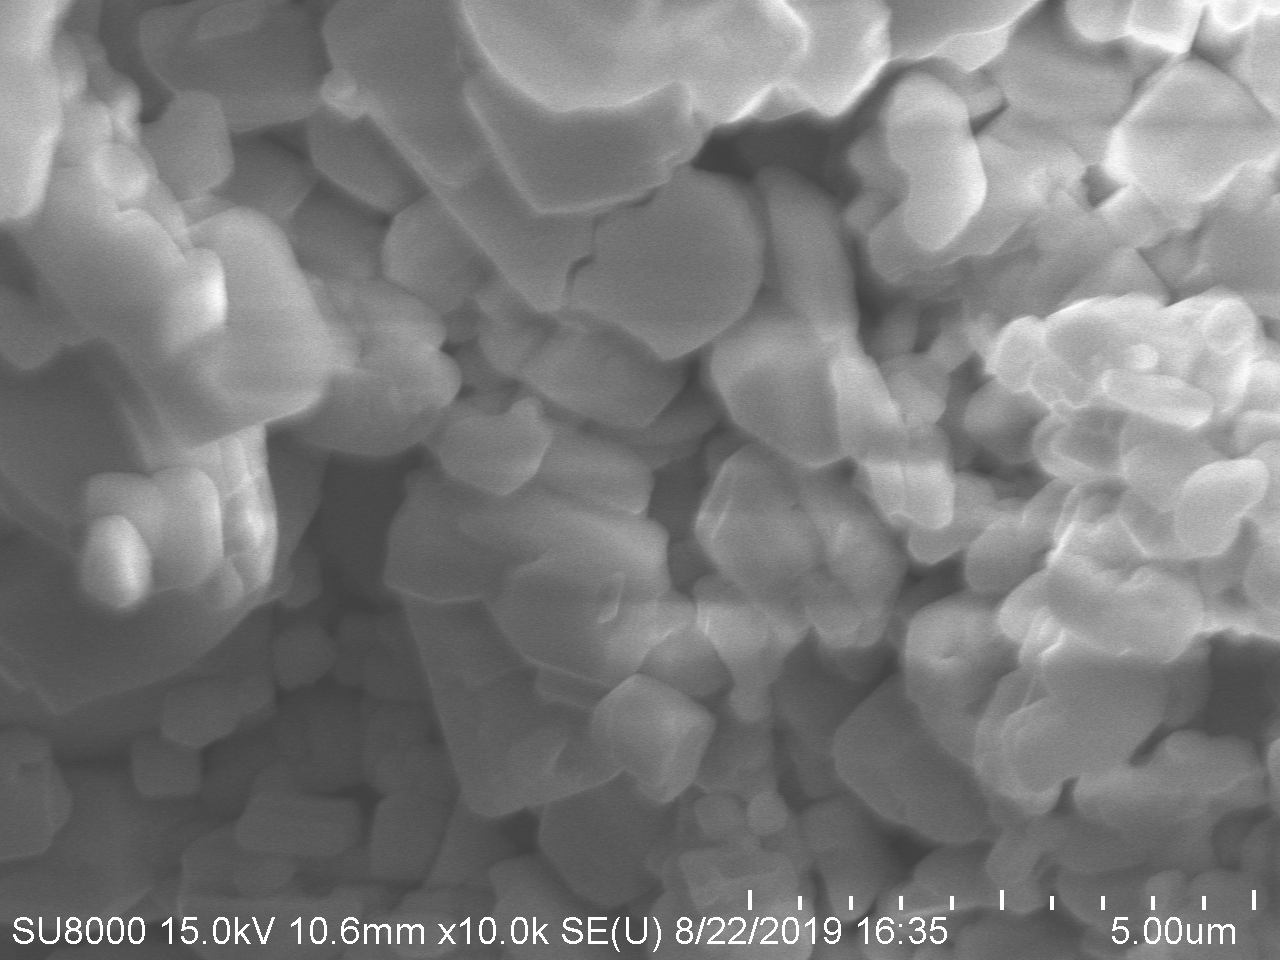

In [114]:
image1239 = PIL.Image.open('./1239.tif')
image1239

In [326]:
image_1239 = plt.imread('./1239.tif')

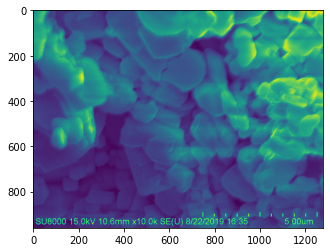

In [328]:
plt.imshow(image_1239)

In [117]:
print('image format:', image1239.format)
print('image shape:', image1239.size)

image format: TIFF
image shape: (1280, 960)


In [332]:
#transfer image #Use PIL to open

In [333]:
image_1239_pil = PIL.Image.open('./1239.tif')

In [335]:
array_1239 = np.asarray(image_1239_pil)

In [336]:
df_1239 = pd.DataFrame(array_1239)

In [343]:
df_1239_copy = df_1239.copy()

In [348]:
pi = [650, 600]
pf = [780, 1280]

In [349]:
df_1239_copy.loc[pi[0]:pf[0], pi[1]:pf[1]] = df_1239.loc[pi[0]:pf[0], pi[1]:pf[1]].add(7)

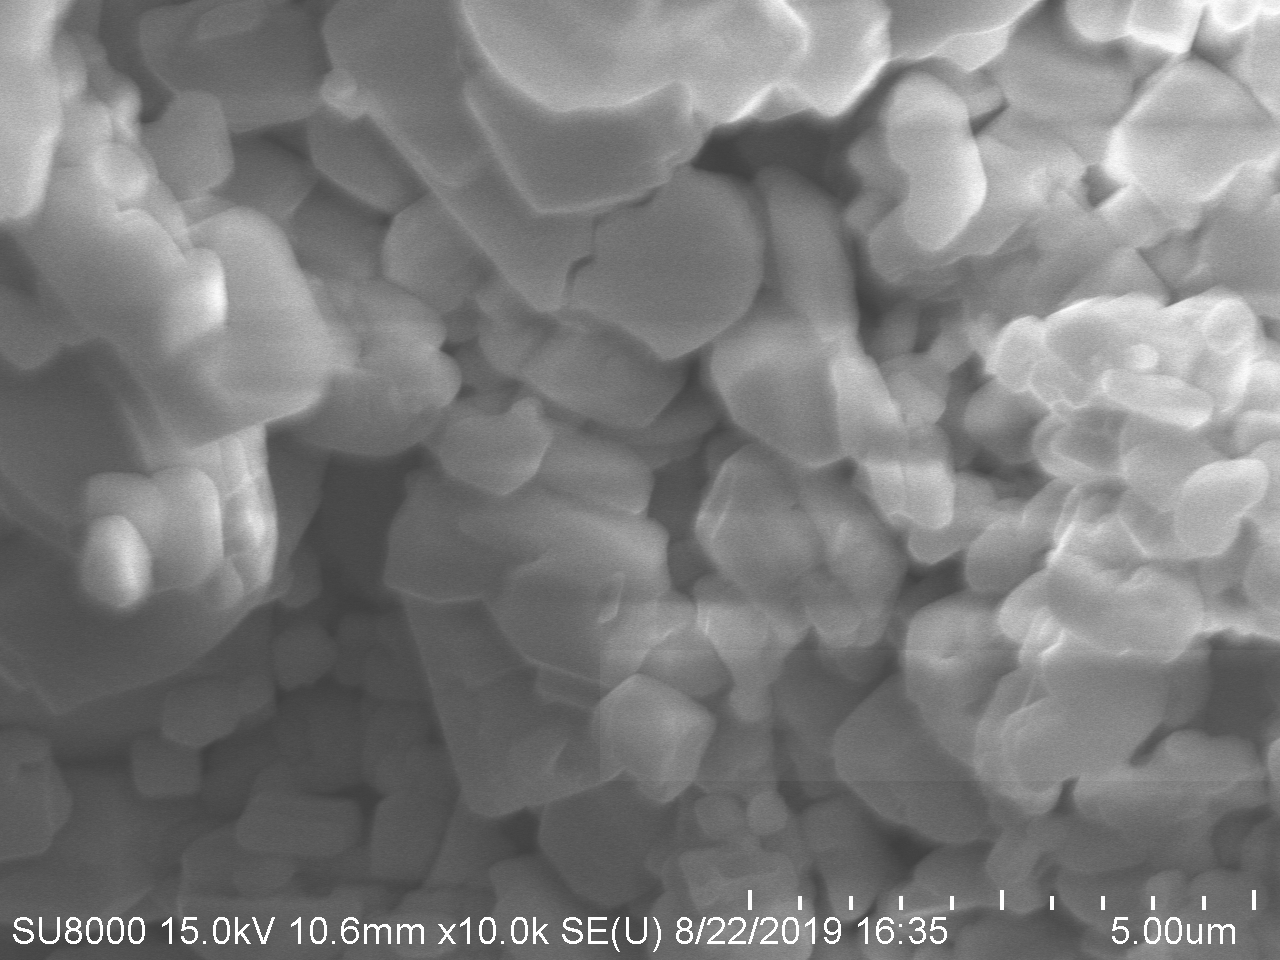

In [350]:
PIL.Image.fromarray(df_1239_copy.values)